# README
---
- Free to replace any stock indexes in list to predict
- Delete runtime of ARIMA or replace another stock indexes after prediction

## Setting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
import seaborn as sns
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.layers import Lambda,Dense,LSTM,Flatten,Reshape,Dropout, Bidirectional, TimeDistributed, RepeatVector,InputLayer, Activation
from keras.layers.convolutional import Conv1D,MaxPooling1D,MaxPooling2D,Conv2D
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras import regularizers
from keras import metrics
keras = tf.keras

In [ ]:
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
%matplotlib inline

## Loading data

In [ ]:
index_list = ["VNI","AHP","DIG","FRT","HBC","NHH","OCB","TCM","TCO","VRC"]
VNI = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/21-22/VNI.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])
VNIcom = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/21-22/VNI.csv',
                        parse_dates=['Date'])
AHP = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/21-22/APH.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])
DIG = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/21-22/DIG.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])
FRT = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/21-22/FRT.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])
HBC = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/21-22/HBC.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])
NHH = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/21-22/NHH.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])
OCB = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/21-22/OCB.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])
TCM = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/21-22/TCM.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])
TCO = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/21-22/TCO.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])
VRC = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/21-22/VRC.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])

In [ ]:
index_test_list = ["VNItest","AHPtest","DIGtest","FRTtest","HBCtest","NHHtest","OCBtest","TCMtest","TCOtest","VRCtest"]
VNItest = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Test/VNI.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])
VNItestcom = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Test/VNI.csv',
                        parse_dates=['Date'])                        
AHPtest = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Test/APH.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])
DIGtest = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Test/DIG.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])
FRTtest = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Test/FRT.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])
HBCtest = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Test/HBC.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])
NHHtest = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Test/NHH.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])
OCBtest = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Test/OCB.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])
TCMtest = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Test/TCM.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])
TCOtest = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Test/TCO.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])
VRCtest = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Test/VRC.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])

In [ ]:
for index in index_list:
  globals()[index] = globals()[index].iloc[::-1]
  globals()[index]["Price"] = globals()[index]["Price"].apply(lambda x: x.replace(",",""))
  globals()[index]["Price"]= pd.to_numeric(globals()[index]["Price"])

In [ ]:
for index in index_test_list:
  globals()[index] = globals()[index].iloc[::-1]
  globals()[index]["Price"] = globals()[index]["Price"].apply(lambda x: x.replace(",",""))

##Preprocess

### CNN-LTSM, LSTM inputs


In [ ]:
time_step = 10
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
def create_train(index='VNI'):
  dataset = globals()[index]
  dataset["Price"] = pd.to_numeric(dataset["Price"])
  dataset = dataset.values
  training_data_len = int(np.ceil(len(globals()[index])))
  scaled_data = scaler.fit_transform(dataset)
  #scaled_data = dataset
  train_data = scaled_data
  x_train = []
  y_train = []
  for i in range(time_step,len(train_data)):
    x_train.append(train_data[i-time_step:i,0])
    y_train.append(train_data[i,0])
  x_train, y_train = np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
  print(x_train.shape)
  return  x_train, y_train

In [ ]:
def create_test(index_train='VNI',index_test='VNItest'):
  total = pd.concat((globals()[index]['Price'].apply(lambda x: float(x)), globals()[index]['Price']), axis = 0)
  inputs = total[len(total)-len(AHPtest)-time_step:].values
  inputs = inputs.reshape(-1,1)
  inputs = scaler.fit_transform(inputs)
  x_test = []
  #y_test = scaler.transform(pd.to_numeric(raw["Price"]).to_numpy().reshape(-1,1))
  for i in range(time_step, len(inputs)):
    x_test.append(inputs[i-time_step:i,0])
  x_test = np.array(x_test)
  x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
  test = globals()[index_test]
  test["Price"] = pd.to_numeric(test["Price"])
  #print(x_test.shape)
  #print(y_test.shape)
  return x_test,test

### CNN inputs

In [ ]:
def CNN_inputs(index='VNI'):
  train = VNI
  train["Price"] = pd.to_numeric(train["Price"])
  train = train.values
  x_train = []
  y_train = []
  for i in range(time_step,int(len(train))):
    x_train.append(train[i-time_step:i,0])
    y_train.append(train[i,0])
  x_train, y_train = np.array(x_train),np.array(y_train)
  x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
  return x_train, y_train

In [ ]:
def CNN_test(index='VNI',index_test='VNItest'):
  total = pd.concat((globals()[index]["Price"].apply(lambda x: float(x)),globals()[index_test]["Price"]),axis=0)
  inp = total[len(total)-len(globals()[index_test])-time_step:].values
  inp = inp.reshape(-1,1)
  x_test = []
  for i in range(time_step,len(inp)):
    x_test.append(inp[i-time_step:i,0])
  x_test = np.array(x_test).astype('float')
  x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
  raw = globals()[index_test]
  raw["Price"] = pd.to_numeric(raw["Price"])
  y_test = pd.to_numeric(raw["Price"]).to_numpy().reshape(-1,1)
  return x_test, y_test, raw

### ARIMA inputs


In [ ]:
def prepare_AR(index='VNI',test_index='VNItest'):
  AR_train = globals()[index]
  AR_test = globals()[test_index]
  AR_train["Price"] = pd.to_numeric(AR_train["Price"])
  AR_test["Price"] = pd.to_numeric(AR_test["Price"])
  AR_train = globals()[index][:len(globals()[index])].values
  AR_test = globals()[test_index].values
  AR_test_data = globals()[test_index]
  #history = [x for x in train]
  #predictions = list()
  return AR_train, AR_test, AR_test_data

## Build model


### CNN

In [ ]:
x_train, y_train = CNN_inputs(index='VNI')
x_test, y_test,raw = CNN_test(index='VNI',index_test='VNItest')
CNNmodel = Sequential()
CNNmodel.add(Conv1D(filters=64, kernel_size=3,activation='relu',input_shape=(time_step, 1)))
CNNmodel.add(Dropout(0.01))
CNNmodel.add(Conv1D(filters=32, kernel_size=3,activation='relu'))
#model.add(Dropout(0.001))
CNNmodel.add(MaxPooling1D(pool_size=2))
CNNmodel.add(Flatten())
#model.add(Dropout(0.01))
CNNmodel.add(Dense(64, activation='relu',kernel_regularizer=regularizers.L1(l1=0.0001)))
CNNmodel.add(Dropout(0.01))
CNNmodel.add(Dense(16, activation='relu',kernel_regularizer=regularizers.L1(l1=0.001)))
#model.add(BatchNormalization())
CNNmodel.add(Dense(1))
#model.add(Dropout(0.01))
CNNmodel.add(Lambda(lambda x: x*100))
early_stopping = keras.callbacks.EarlyStopping(patience=8,monitor='loss')
CNNmodel.compile(optimizer=Adam(learning_rate=0.0003),loss='mean_squared_error')

In [ ]:
CNNmodel.fit(x_train, y_train, batch_size=1, epochs=50, callbacks=[early_stopping])

Epoch 1/50
259/259 [==============================] - 2s 2ms/step - loss: 6270508.5000
Epoch 2/50
259/259 [==============================] - 1s 2ms/step - loss: 951376.8125
Epoch 3/50
259/259 [==============================] - 1s 2ms/step - loss: 604318.1250
Epoch 4/50
259/259 [==============================] - 1s 3ms/step - loss: 422155.1250
Epoch 5/50
259/259 [==============================] - 1s 3ms/step - loss: 280947.0625
Epoch 6/50
259/259 [==============================] - 1s 2ms/step - loss: 193411.4375
Epoch 7/50
259/259 [==============================] - 1s 2ms/step - loss: 151222.2656
Epoch 8/50
259/259 [==============================] - 1s 2ms/step - loss: 115835.8828
Epoch 9/50
259/259 [==============================] - 1s 2ms/step - loss: 108379.7734
Epoch 10/50
259/259 [==============================] - 1s 2ms/step - loss: 81712.3203
Epoch 11/50
259/259 [==============================] - 1s 3ms/step - loss: 68653.4062
Epoch 12/50
259/259 [==============================] 

In [ ]:
CNNpredictions = CNNmodel.predict(x_test)

2/2 [==============================] - 0s 7ms/step


In [ ]:
print('MSE',mean_squared_error(raw['Price'],CNNpredictions))
print('MAE',mean_absolute_error(raw['Price'],CNNpredictions))

MSE 2235.203009543901
MAE 40.93186878204346


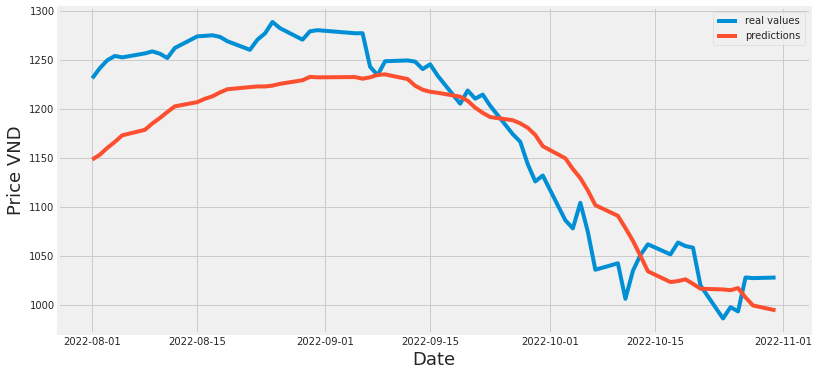

In [ ]:
raw["Predictions"] = CNNpredictions
plt.figure(figsize=(12,6))
plt.plot(raw["Price"])
plt.plot(raw["Predictions"])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price VND', fontsize=18)
plt.legend(['real values','predictions'],loc='upper right')
plt.show()

### ARIMA


In [ ]:
AR_train, AR_test, AR_test_data = prepare_AR(index='VNI',test_index='VNItest')
history = [x for x in AR_train]
ARpredictions = list()
for t in range(len(AR_test)):
  model = ARIMA(history, order=(5,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  ARpredictions.append(yhat)
  obs = AR_test[t]
  history.append(obs)
#AR_predict = predictions
#AR_test = VNItest
AR_test_data['Predictions'] = ARpredictions

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn

In [ ]:
print('MSE',mean_squared_error(AR_test_data['Price'],ARpredictions))
print('MAE',mean_absolute_error(AR_test_data['Price'],ARpredictions))

MSE 299.95358642304757
MAE 12.879573410034988


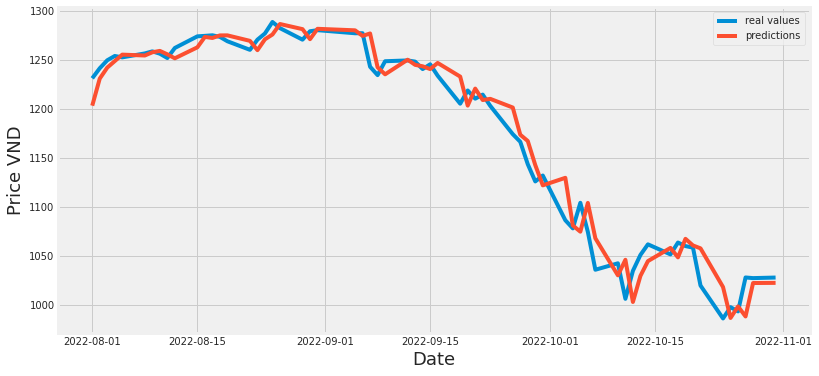

In [ ]:
#AR_test_data["Predictions"] = predictions
plt.figure(figsize=(12,6))
plt.plot(AR_test_data["Price"])
plt.plot(AR_test_data["Predictions"])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price VND', fontsize=18)
plt.legend(['real values','predictions'],loc='upper right')
plt.show()

### CNN-LSTM


In [ ]:
'''
x_train, y_train = create_train(index='VNI')
x_test,test = create_test(index_train='VNI',index_test='VNItest')
hybridmodel = Sequential()
hybridmodel.add(Conv1D(filters=32, kernel_size=3,activation='relu',input_shape=(x_train.shape[1], 1)))
#hybridmodel.add(Dropout(0.01))
hybridmodel.add(Conv1D(filters=64, kernel_size=3,activation='relu'))
hybridmodel.add(Conv1D(filters=32, kernel_size=3,activation='relu'))
hybridmodel.add(MaxPooling1D(pool_size=2))
hybridmodel.add(Flatten())
hybridmodel.add(RepeatVector(time_step))
#model.add(Reshape((x_train.shape[1],1)))
hybridmodel.add(LSTM(16,return_sequences=True,activation='relu'))
hybridmodel.add(Dropout(0.001))
hybridmodel.add(LSTM(32,return_sequences=True,activation='relu'))
#model.add(Dropout(0.02))
hybridmodel.add(LSTM(64,return_sequences=True,activation='relu'))
hybridmodel.add(Dropout(0.2))
#model.add(LSTM(64))
#model.add(Dropout(0.2))
#model.add(Dense(16))
hybridmodel.add(TimeDistributed(Dense(100,activation='relu',kernel_regularizer=regularizers.L1(0.001))))
hybridmodel.add(TimeDistributed(Dense(8)))
hybridmodel.add(LSTM(16))
hybridmodel.add(Dropout(0.1))
hybridmodel.add(Dense(8,activation='relu',kernel_regularizer=regularizers.L1(0.0005)))
hybridmodel.add(Dense(1))
hybridmodel.add(Lambda(lambda x: x*100))
#early_stopping = keras.callbacks.EarlyStopping(patience=20,monitor='loss')
hybridmodel.compile(optimizer=Adam(learning_rate=0.003),loss='mean_squared_error')

#model.fit(x_train,y_train, batch_size=6, epochs=500, shuffle=True, callbacks=[early_stopping])
hybridmodel.fit(x_train,y_train, batch_size=6, epochs=50, shuffle=False)
'''

In [ ]:
x_train, y_train = create_train(index='VNI')
x_test,test = create_test(index_train='VNI',index_test='VNItest')

(261, 10, 1)


In [ ]:
hybridmodel = Sequential()
hybridmodel.add(Conv1D(filters=32,kernel_size=1,activation='tanh',padding='same'))
hybridmodel.add(MaxPooling1D(pool_size=1,padding='same'))
hybridmodel.add(Activation('relu'))
hybridmodel.add(LSTM(64,activation='tanh'))
#hybridmodel.add(Dropout(0.01))
hybridmodel.add(Dense(1))
#hybridmodel.add(Lambda(lambda x: x*10))

hybridmodel.compile(optimizer=Adam(learning_rate=0.001),loss='mean_squared_error')
hybridmodel.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
9/9 [==============================] - 2s 9ms/step - loss: 0.3628
Epoch 2/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0465
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0338
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0166
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0136
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0108
Epoch 7/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0092
Epoch 8/100
9/9 [==============================] - 0s 10ms/step - loss: 0.0083
Epoch 9/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0080
Epoch 10/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 11/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0071
Epoch 12/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0067
Epoch 13/100
9/9 [==============================] - 0s 9ms/s

In [ ]:
predictions = hybridmodel.predict(x_test)
predictions = scaler.inverse_transform(predictions)
test["predictions"] = predictions/10

2/2 [==============================] - 0s 13ms/step


In [ ]:
print('MSE',mean_squared_error(test['Price'],test["predictions"]))
print('MAE',mean_absolute_error(test['Price'],test["predictions"]))

MSE 22753.287078557296
MAE 118.51154357910156


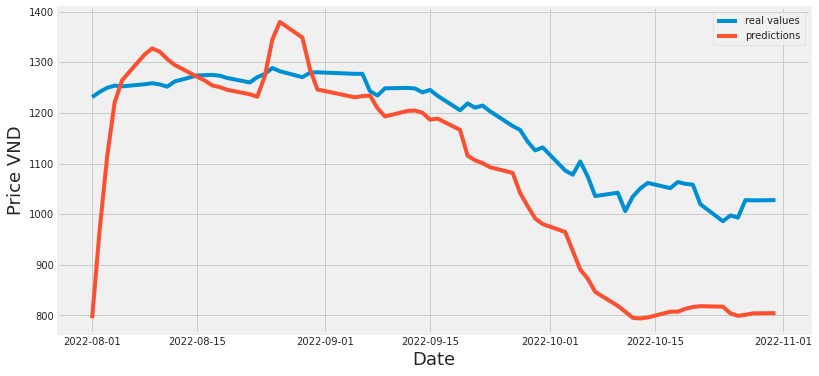

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(test["Price"])
plt.plot(test["predictions"])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price VND', fontsize=18)
plt.legend(['real values','predictions'],loc='upper right')
plt.show()

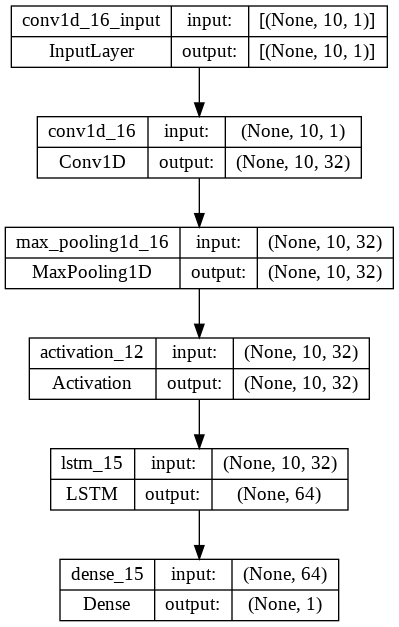

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(hybridmodel, show_shapes=True)